In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [119]:
import pandas as pd

df = pd.read_csv("/home/jovyan/MonDossier/machine learning/winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
#x= df[["volatile acidity","alcohol","quality","residual sugar","sulphates","pH"]]
x=df["sulphates"]
y=df["quality"]

In [121]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Check the independant variable

Looking at the distribution of quality values, we can see that the data is highly imbalanced, with the majority of wines having a quality score of 5 or 6

In [122]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Features selection

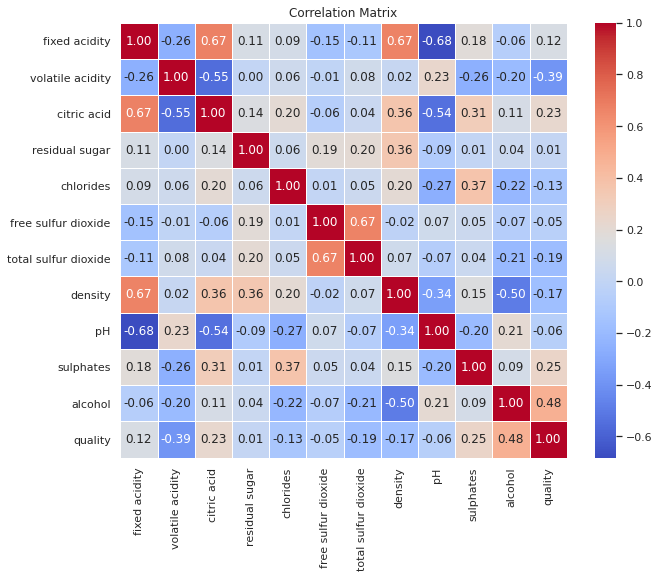

In [123]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [125]:
values =correlation_matrix["quality"]
abs(values).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

conslusion = keeping the features that have more than 0.20 correlation with the quality of the wine

## Check For Multicolineraty 

In [126]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = df[["sulphates", "alcohol", "volatile acidity", "citric acid"]]


vif = pd.DataFrame()


vif_values = []


for i in range(variables.shape[1]):
    vif_value = variance_inflation_factor(variables.values, i)
    vif_values.append(vif_value)


vif['Features'] = variables.columns


vif['VIF'] = vif_values


vif


,Features,VIF
0,sulphates,16.440732
1,alcohol,27.195806
2,volatile acidity,10.339324
3,citric acid,4.189140


alcohol , sulphates and volatile acidity are highly correlated , here are some suggestions:
- remove the features thta are highly correlated 
- combine them 
- perform a regularization

conclusion =  remove volatile acidity because alcohol is an important feature to determine the wine quality

In [127]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = df[["chlorides", "alcohol", "citric acid"]]


vif = pd.DataFrame()


vif_values = []


for i in range(variables.shape[1]):
    vif_value = variance_inflation_factor(variables.values, i)
    vif_values.append(vif_value)


vif['Features'] = variables.columns


vif['VIF'] = vif_values

vif


,Features,VIF
0,chlorides,4.205502
1,alcohol,5.054304
2,citric acid,3.133938


## Scaling

In [128]:
inputs= df[["chlorides", "alcohol", "citric acid"]]

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)


## Split data 

In [130]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(inputs_scaled,y,test_size=0.2,random_state =365)

## Smote 

Looking at the distribution of quality values, we can see that the data is highly imbalanced, with the majority of wines having a quality score of 5 or 6

In [131]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [132]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [133]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


## Regression with statmodel

In [134]:
import statsmodels.api as sm
x=sm.add_constant(x_train_res)
results = sm.OLS(y_train_res,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1157.
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:32:15   Log-Likelihood:                -5128.9
No. Observations:                3228   AIC:                         1.027e+04
Df Residuals:                    3224   BIC:                         1.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2771      0.022    241.321      0.000       5.234       5.320
x1            -0.3725      0.027    -13.875      0.000      -0.425      -0.320
x2             0.7467      0.021     36.190      0.000       0.706       0.787
x3             0.6723      0.021     31.639      0.000       0.631       0.714
==============================================================================
Omnibus:                      146.889   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.529
Skew:                          -0.068   Prob(JB):                     2.64e-14
Kurtosis:                       2.332   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

-R-squared :The model now explains 51.8% of the variance in quality
-p values : the features all have p-values that are statisticaly significant  
-slight skewness even with the SMOTE
-The Omnibus test  : tests the null hypothesis that the residuals are normally distributed. the p-value (0.000) is very small, suggesting that the residuals are not normally distributed.
-Positive autocorrelation: The Durbin-Watson statistic (1.024) suggests positive autocorrelation in the residuals. 
-multicolineraty is low 